# Librerias

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## Descripción
Este conjunto de datos de UCI contiene cantidad crediticia, datos demográficos, historial de pagos y extractos de facturas de clientes de tarjetas de crédito en Taiwán desde abril de 2005 hasta septiembre de 2005. 
Finalmente esta investigación tiene como objetivo el caso de los pagos por incumplimiento de los clientes en Taiwán que es lo que se va a predecir.


In [3]:
# Leer el archivo de dato csv
df = pd.read_csv("default of credit card clients.csv").rename(columns={'PAY_0':'PAY_1','default payment next month':'default'})

## Mostrar datos

In [15]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


## Descripción de los datos
* ID: ID de cada cliente, variable numérica
* LIMIT_BAL: cantidad de credito otorgado en dolares de taiwan (variable númerica)
* SEX: Sexo, variable categórica (1  masculino, 2  femenino)
* EDUCATION: Nivel maximo eduacional, variable categórica (1 postgrado, 2 universidad, 3  bachillerato, 4 otros) 
* MARRIAGE: Estado civil, variable categórica (1 casado, 2 soltero, 3  otros)
* AGE: edad, variable numérica
* PAY_X: Historial de pagos pasados. Son registros de pagos mensuales anteriores (de abril a septiembre de 2005), variable numérica
* BILL_AMTX: Monto del estado de la cuenta  en dolares de taiwan, variable numérica
* PAY_AMTX: Monto del pago anterior en dolares de taiwan, variable numérica

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#


## Descriptiva Basica

Variable continua
* Media
* Desviación estandar
* Rango

In [16]:
# Generar estadisticas descriptivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [17]:
# Verificamos si hay datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [18]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [7]:
del df["ID"]

Variable nominales
* Moda
* Conjunto de valores que toma.

In [ ]:
df.EDUCATION.value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [ ]:
#df['default payment next month'].value_counts().sort_index()
aux = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[aux,"EDUCATION"] = 4
print(df.EDUCATION.value_counts().sort_index())

1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64


In [ ]:
moda_EDUCATION,frecuencia_EDUCATION = stats.mode(df['EDUCATION'])
print('Moda Educacion: '+str(moda_EDUCATION[0]).replace("1","Posgrado").replace("2","Universidad").replace("3","Bachillerato").replace("4","Otros")
+' , frecuencia: '+str(frecuencia_EDUCATION[0]))

Moda Educacion: Universidad , frecuencia: 14030


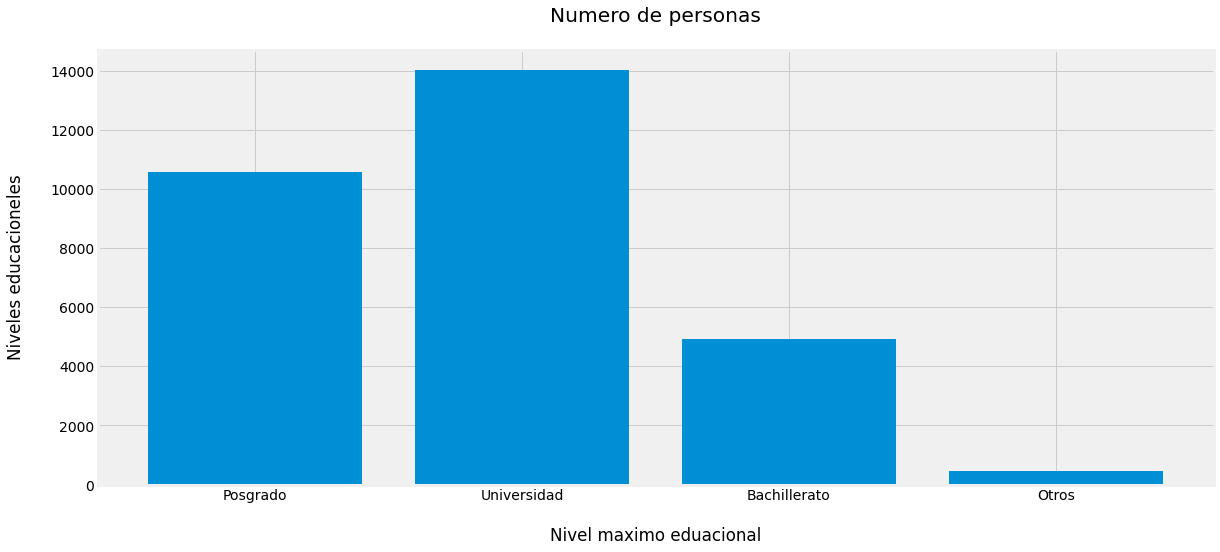

In [ ]:
plt.figure(figsize=(20,8))
with plt.style.context('fivethirtyeight'):
  plt.bar(df.EDUCATION.value_counts().index, df.EDUCATION.value_counts().values)

  plt.xlabel('\nNivel maximo eduacional')
  plt.ylabel('Niveles educacioneles\n')
  plt.title('Numero de personas\n')
  plt.xticks([1,2,3,4],["Posgrado","Universidad","Bachillerato","Otros"])
  plt.show()

In [ ]:
aux = (df.MARRIAGE == 0)
df.loc[aux,"MARRIAGE"] = 3
print(df.MARRIAGE.value_counts().sort_index())

1    13659
2    15964
3      377
Name: MARRIAGE, dtype: int64


In [ ]:
moda_MARRIAGE,frecuencia_MARRIAGE = stats.mode(df['MARRIAGE'])
print('Moda estado civil: '+str(moda_MARRIAGE[0]).replace("1","Casado").replace("2","Soltero").replace("3","Otros")
+' , frecuencia: '+str(frecuencia_MARRIAGE[0]))

Moda estado civil: Soltero , frecuencia: 15964


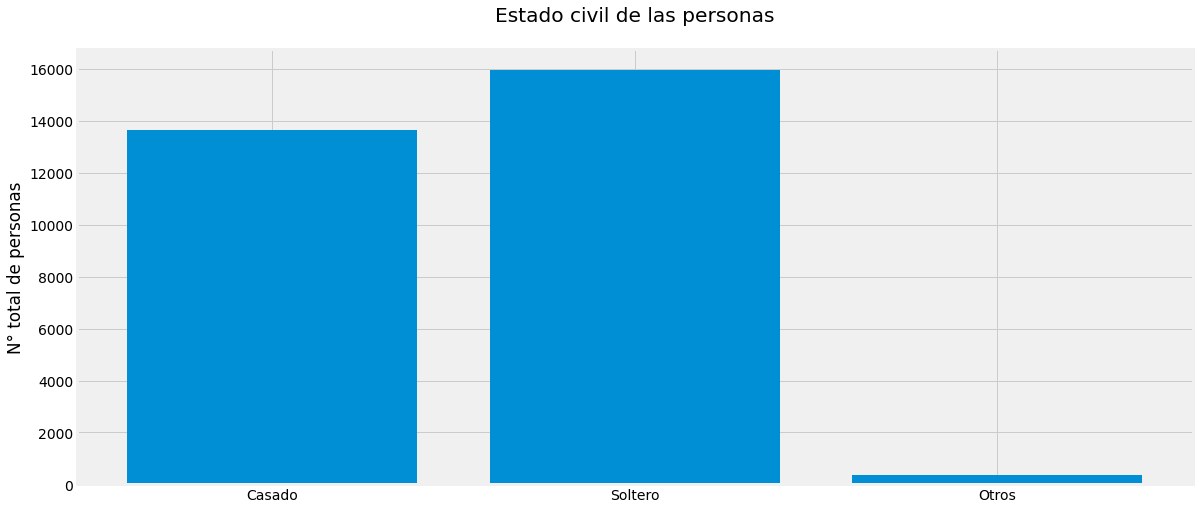

In [ ]:
plt.figure(figsize=(20,8))
with plt.style.context('fivethirtyeight'):
  plt.bar(df.MARRIAGE.value_counts().index, df.MARRIAGE.value_counts().values)

  plt.ylabel('N° total de personas')
  plt.title('Estado civil de las personas\n')
  plt.xticks([1,2,3],["Casado","Soltero","Otros"])

  plt.show()

In [ ]:
moda_SEX,frecuencia_SEX = stats.mode(df['SEX'])
print('Moda sexo: '+str(moda_SEX[0]).replace("1","Masculino").replace("2","Femenino")
+' , frecuencia: '+str(frecuencia_SEX[0]))

Moda sexo: Femenino , frecuencia: 18112


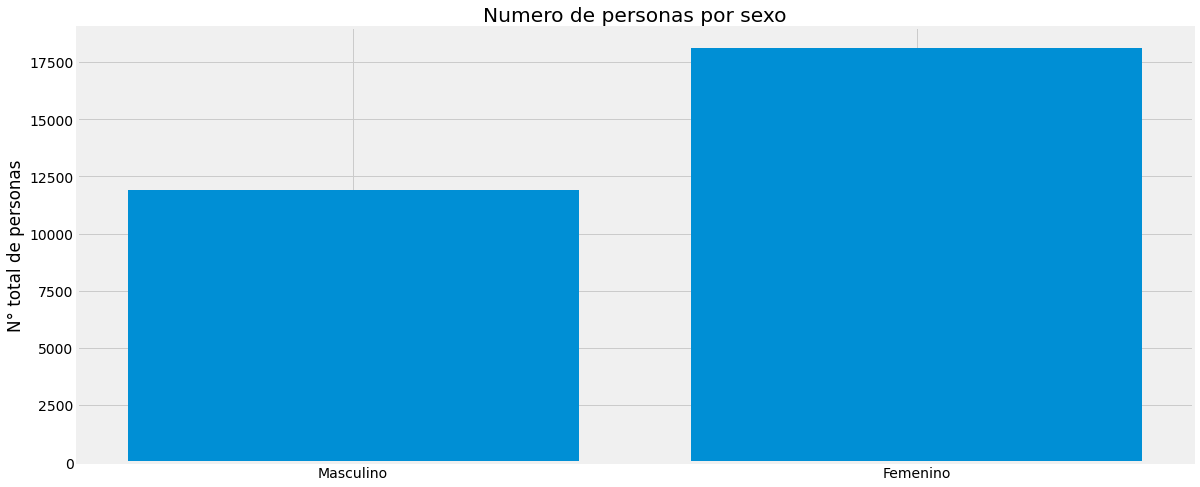

In [ ]:
plt.figure(figsize=(20,8))
with plt.style.context('fivethirtyeight'):
  plt.bar(df.SEX.value_counts().index, df.SEX.value_counts().values)

  plt.ylabel('N° total de personas')
  plt.title('Numero de personas por sexo')
  plt.xticks([1,2],["Masculino","Femenino"])
  plt.show()

In [ ]:
moda_AGE,frecuencia_AGE = stats.mode(df['AGE'])
print('Moda edad: '+str(moda_AGE[0])+' , frecuencia: '+str(frecuencia_AGE[0]))

Moda edad: 29 , frecuencia: 1605


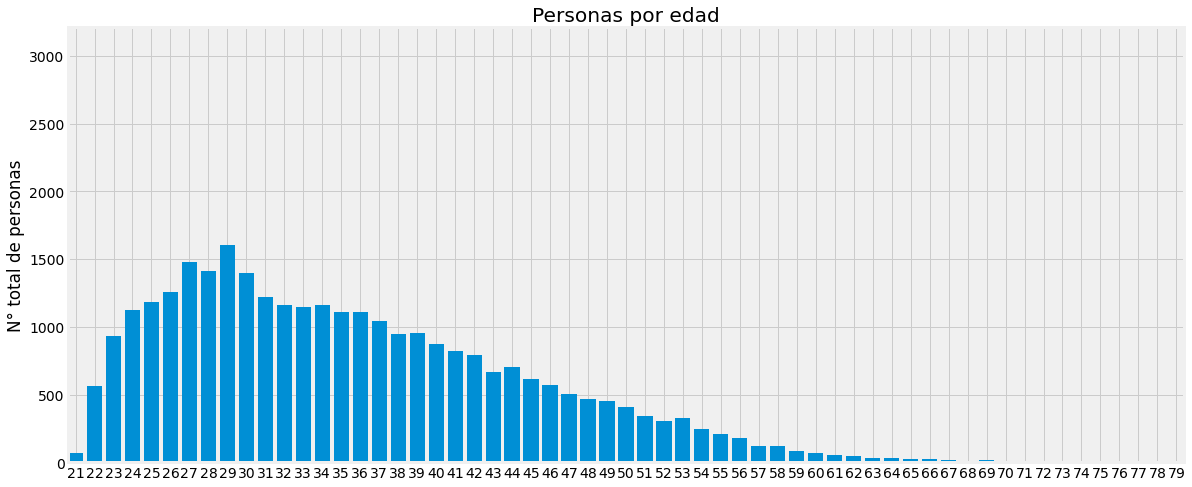

In [11]:
plt.figure(figsize=(20,8))
with plt.style.context('fivethirtyeight'):
  plt.bar(df.AGE.value_counts().index, df.AGE.value_counts().values)

  plt.ylabel('Edades')
  plt.ylabel('N° total de personas')
  plt.title('Personas por edad')
  plt.xticks(np.arange(20,80,step=1))
  plt.margins(0,1)

  plt.show()

* Coef. correlación

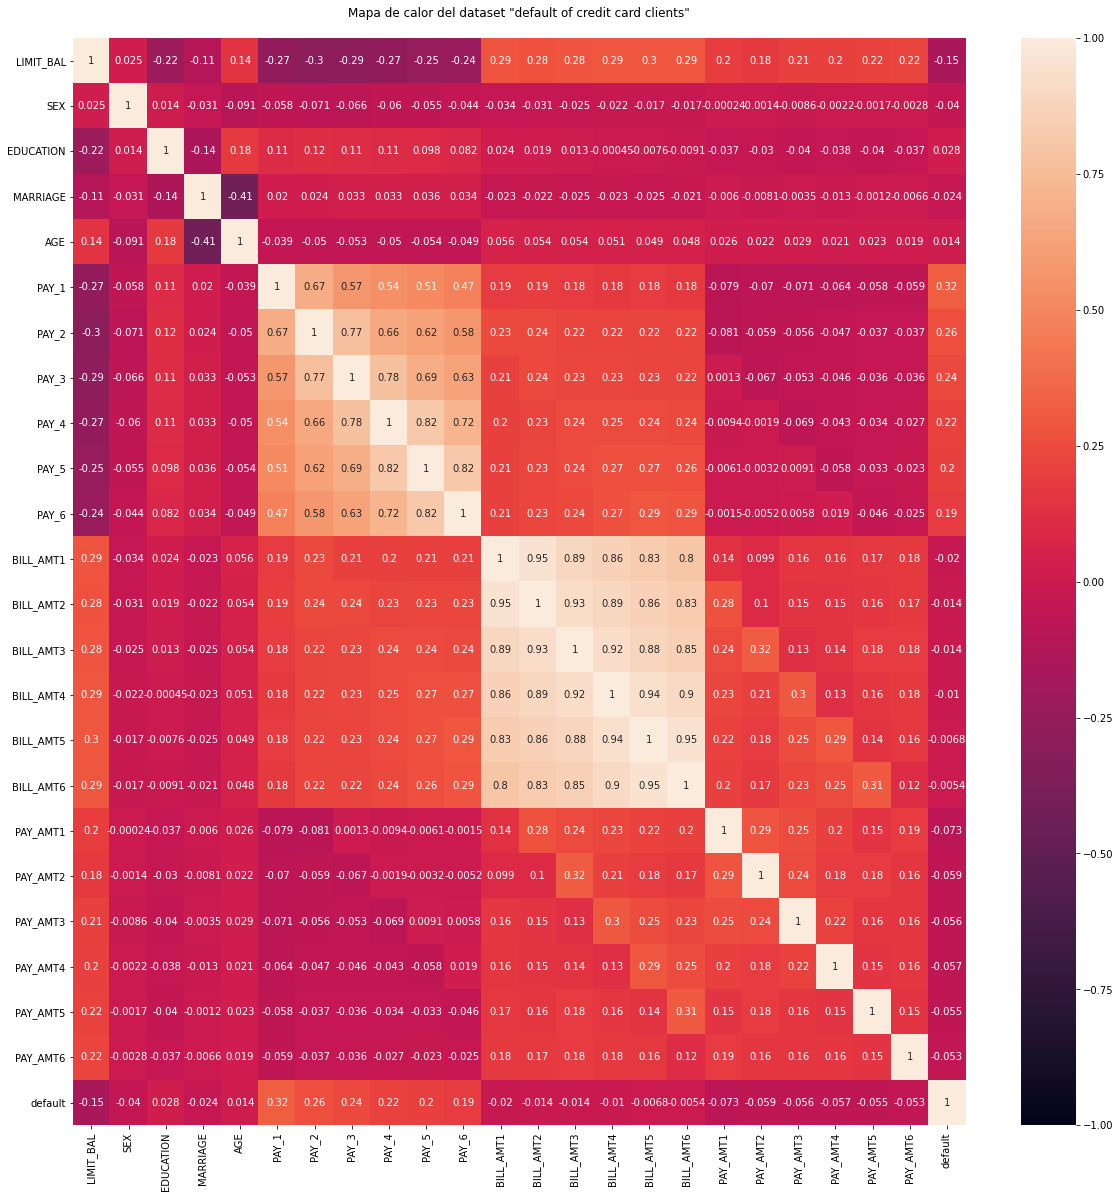

In [ ]:
plt.figure(figsize=(20,20))
g = df.corr(method='pearson')
sns.heatmap(g, annot = True, vmin=-1, vmax=1)
plt.title("Mapa de calor del dataset \"default of credit card clients\"\n")
plt.show()

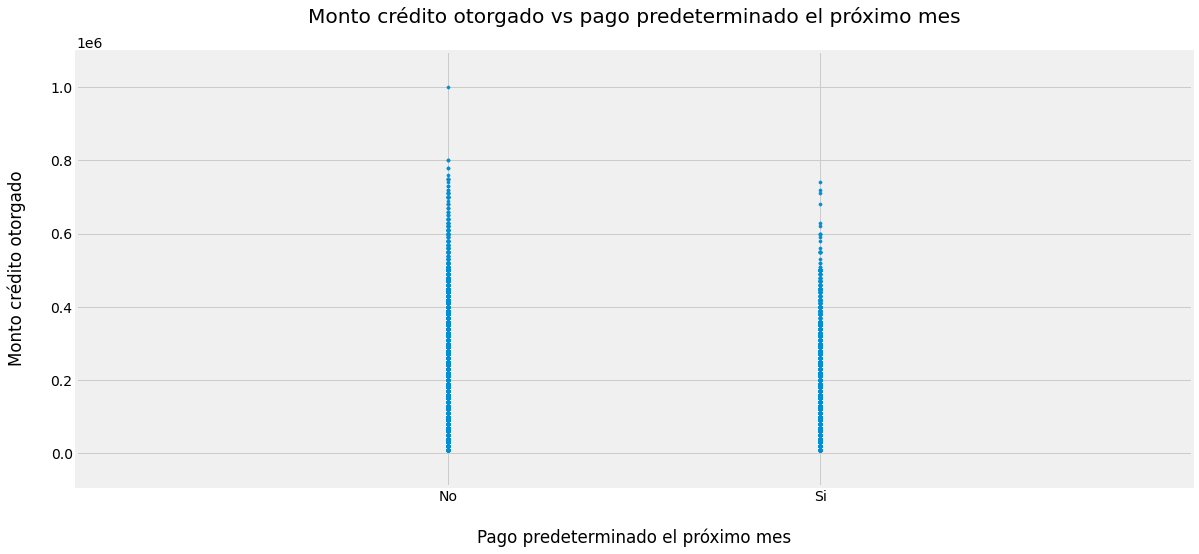

In [ ]:
plt.figure(figsize=(20,8))

with plt.style.context('fivethirtyeight'):
  plt.scatter(df.default , df.LIMIT_BAL, s=10)

  plt.xlabel('\nPago predeterminado el próximo mes')
  plt.ylabel('Monto crédito otorgado\n')
  plt.title('Monto crédito otorgado vs pago predeterminado el próximo mes\n')
  plt.xticks([0,1],["No","Si"])
  plt.margins(1,0.1)

  plt.show()

* Diagrama de dispersión

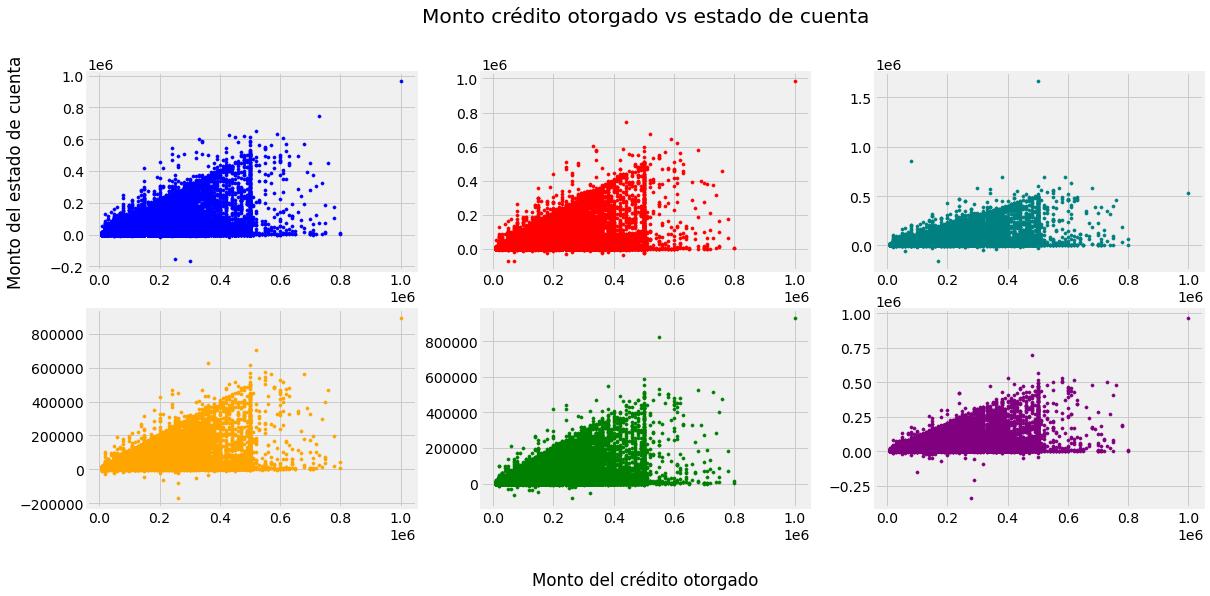

In [ ]:
plt.figure(figsize=(20,8))
with plt.style.context('fivethirtyeight'):

  plt.subplot(231)
  plt.ylabel('Monto del estado de cuenta\n')
  plt.scatter(df.LIMIT_BAL, df.BILL_AMT1, color="blue" , s=10)

  plt.subplot(232)
  plt.title('Monto crédito otorgado vs estado de cuenta\n\n')
  plt.scatter(df.LIMIT_BAL, df.BILL_AMT2, color="red" , s=10)

  plt.subplot(233)
  plt.scatter(df.LIMIT_BAL, df.BILL_AMT3, color="teal" , s=10)
 
  plt.subplot(234)
  plt.scatter(df.LIMIT_BAL, df.BILL_AMT4, color="orange", s=10 )

  plt.subplot(235)
  plt.xlabel('\n\nMonto del crédito otorgado')
  plt.scatter(df.LIMIT_BAL, df.BILL_AMT5, color="green", s=10 )

  plt.subplot(236)
  plt.scatter(df.LIMIT_BAL, df.BILL_AMT6, color="purple", s=10 )

  plt.show()

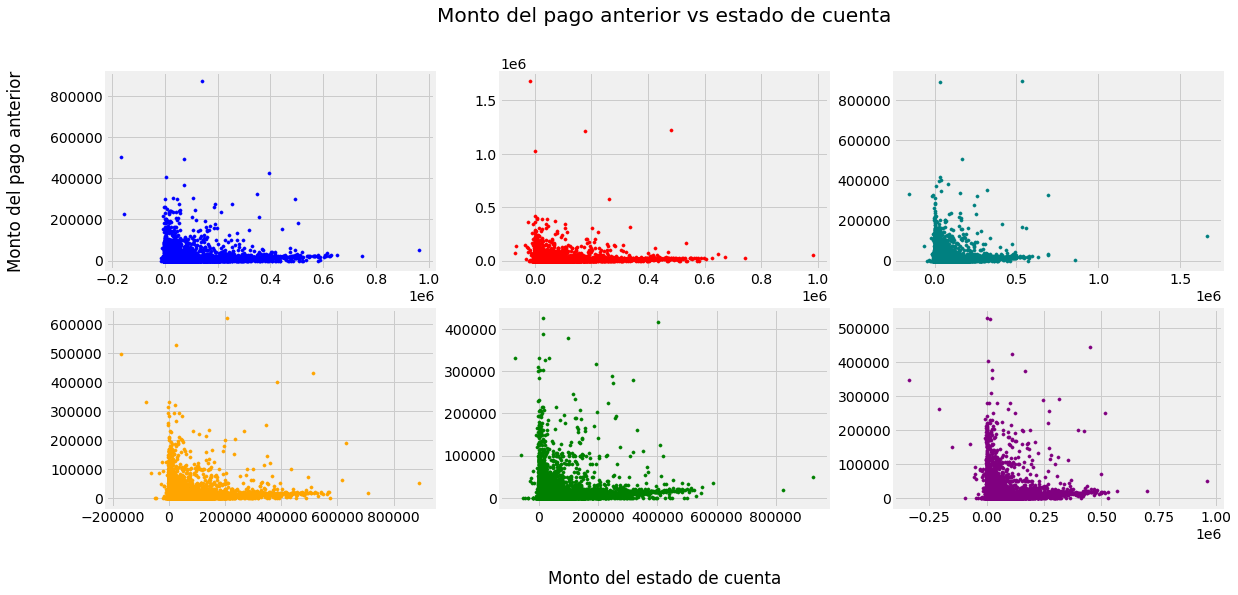

In [5]:
plt.figure(figsize=(20,8))
with plt.style.context('fivethirtyeight'):

  
  plt.subplot(231)
  plt.ylabel('Monto del pago anterior\n')
  plt.scatter(df.BILL_AMT1,df.PAY_AMT1, color="blue" , s=10)

  plt.subplot(232)
  plt.title('Monto del pago anterior vs estado de cuenta\n\n')
  plt.scatter(df.BILL_AMT2,df.PAY_AMT2, color="red" , s=10)

  plt.subplot(233)
  plt.scatter(df.BILL_AMT3,df.PAY_AMT3, color="teal" , s=10)
 
  plt.subplot(234)
  plt.scatter(df.BILL_AMT4,df.PAY_AMT4, color="orange", s=10 )

  plt.subplot(235)
  plt.xlabel('\n\nMonto del estado de cuenta')
  plt.scatter(df.BILL_AMT5,df.PAY_AMT5, color="green", s=10 )

  plt.subplot(236)
  plt.scatter(df.BILL_AMT6,df.PAY_AMT6, color="purple", s=10 )

  plt.show()

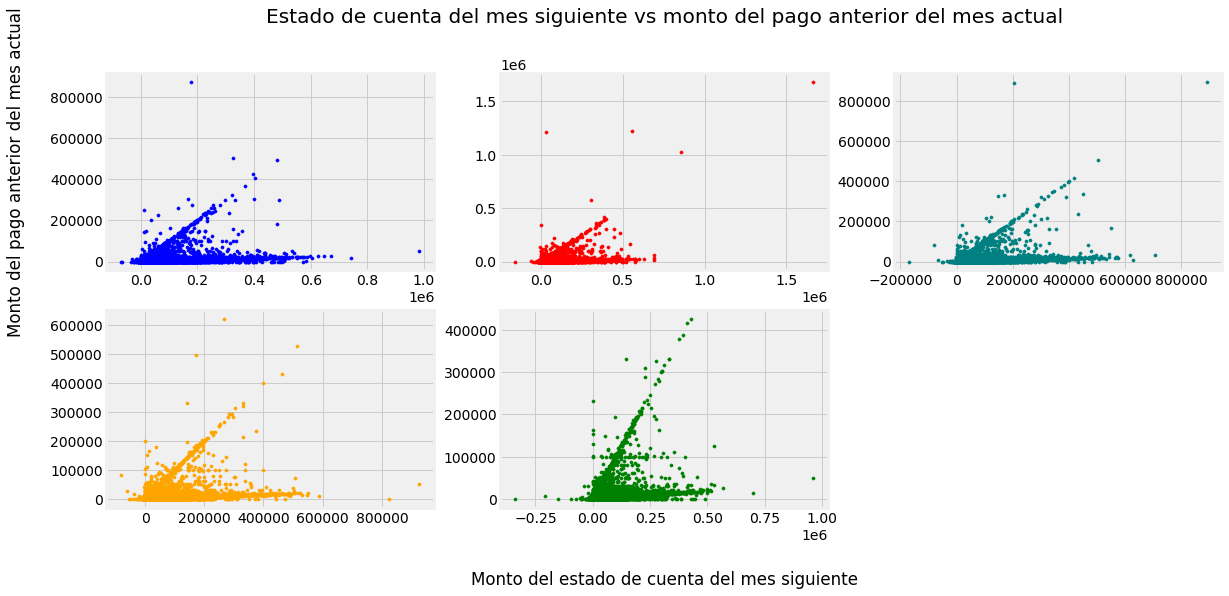

In [15]:
plt.figure(figsize=(20,8))
with plt.style.context('fivethirtyeight'):
  plt.subplot(231)
  plt.ylabel('Monto del pago anterior del mes actual\n')
  plt.scatter(df.BILL_AMT2,df.PAY_AMT1, color="blue" , s=10)

  plt.subplot(232)
  plt.title('Estado de cuenta del mes siguiente vs monto del pago anterior del mes actual\n\n')
  plt.scatter(df.BILL_AMT3,df.PAY_AMT2, color="red" , s=10)

  plt.subplot(233)
  plt.scatter(df.BILL_AMT4,df.PAY_AMT3, color="teal" , s=10)
 
  plt.subplot(234)
  plt.scatter(df.BILL_AMT5,df.PAY_AMT4, color="orange", s=10 )

  plt.subplot(235)
  plt.xlabel('\n\nMonto del estado de cuenta del mes siguiente')
  plt.scatter(df.BILL_AMT6,df.PAY_AMT5, color="green", s=10 )

  plt.show()